In [2]:
import pandas as pd

data = pd.read_excel('Some birb.xlsx')
data.head()

,species,birdID,date,longitude,latitude
0,Black-bellied plover,19,2017-07-07,-166.3367,64.8885
1,Black-bellied plover,19,2017-07-08,-166.3169,64.8800
2,Black-bellied plover,19,2017-07-10,-166.3270,64.8595
3,Black-bellied plover,19,2017-07-10,-166.3195,64.8677
4,Black-bellied plover,19,2017-07-12,-166.3118,64.8656


In [4]:
data.shape

(703, 5)

In [5]:
data[::50]

,species,birdID,date,longitude,latitude
0,Black-bellied plover,19,2017-07-07,-166.3367,64.8885
50,Black-bellied plover,20,2017-07-31,-137.1689,54.0593
100,Black-bellied plover,8,2017-07-28,-150.7762,70.4846
150,Black-crowned night heron,Smith,2016-09-07,-75.3840,39.2250
200,Brown pelican,Plimpy,2017-08-01,-76.2037,38.1720
250,Long-billed curlew,141772,2017-06-09,-103.7740,43.0881
300,Long-billed curlew,154067,2017-04-04,-81.2926,31.3537
350,Long-billed curlew,154072,2017-04-03,-101.0088,43.7072
400,Pacific loon,Alpine 01,2017-09-30,-166.7018,70.2486
450,Pacific loon,Y-K 03,2017-04-24,-122.1597,37.1169


In [4]:
species_groups = data.groupby('species')

for species, group in species_groups:
    duplicates = group.duplicated(subset=['birdID', 'date'], keep=False)
    if duplicates.any():
        print(f"Species '{species}' has duplicate (birdID, date) pairs.")
    else:
        print(f"Species '{species}' does not have duplicate (birdID, date) pairs.")

Species 'Black-bellied plover' has duplicate (birdID, date) pairs.
Species 'Black-crowned night heron' has duplicate (birdID, date) pairs.
Species 'Brown pelican' has duplicate (birdID, date) pairs.
Species 'Long-billed curlew' has duplicate (birdID, date) pairs.
Species 'Pacific loon' has duplicate (birdID, date) pairs.
Species 'Swainson's hawk' does not have duplicate (birdID, date) pairs.


In [7]:
print(species_groups)
for species, group in species_groups:
    print()
    print(species)
    print(group[:2])


Black-bellied plover
                species birdID       date  longitude  latitude
0  Black-bellied plover     19 2017-07-07  -166.3367   64.8885
1  Black-bellied plover     19 2017-07-08  -166.3169   64.8800

Black-crowned night heron
                       species  birdID       date  longitude  latitude
121  Black-crowned night heron  Parker 2016-06-24   -77.0727   38.9256
122  Black-crowned night heron  Parker 2016-09-14   -80.1200   32.9330

Brown pelican
           species     birdID       date  longitude  latitude
167  Brown pelican  Grindylow 2017-07-19   -76.0889   38.1507
168  Brown pelican  Grindylow 2017-07-20   -76.0647   38.1422

Long-billed curlew
                species  birdID       date  longitude  latitude
243  Long-billed curlew  141772 2017-03-18   -97.3135   27.4731
244  Long-billed curlew  141772 2017-03-21   -97.3278   27.4413

Pacific loon
          species     birdID       date  longitude  latitude
375  Pacific loon  Alpine 01 2017-03-27  -234.6625   36.3210


In [ ]:
import matplotlib.pyplot as plt

group = species_groups.get_group('Black-bellied plover')

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over unique bird IDs
for bird_id in group['birdID'].unique():
    bird_df = group[group['birdID'] == bird_id]
    plt.plot(bird_df['longitude'], bird_df['latitude'], marker='o', label=bird_id)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Birds Movement')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from mpl_toolkits.basemap import Basemap

# Plotting on world map backdrop
plt.figure(figsize=(10, 8))

# Create a Basemap instance with the desired map projection
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

# Draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Convert longitude and latitude to map coordinates
x, y = m(group['longitude'].values, group['latitude'].values)

# Plotting bird movements
for bird_id in group['birdID'].unique():
    bird_df = group[group['birdID'] == bird_id]
    x, y = m(bird_df['longitude'].values, bird_df['latitude'].values)
    plt.plot(x, y, marker='o', label=bird_id)

plt.title('Birds Movement on World Map')
plt.legend()
plt.show()

In [103]:
import numpy as np

def plot_species(species, llcrnrlat, urcrnrlat, llcrnrlon, urcrnrlon, figure_size=(10,8)): # Define global variables for latitude and longitude boundaries
    group = species_groups.get_group(species)
    
    # Plotting on world map backdrop
    plt.figure(figsize=figure_size)

    # Create a Basemap instance with the desired map projection
    m = Basemap(projection='merc', llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon)

    # Draw coastlines, countries, and states
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()

    # Draw meridians (lines of longitude)
    meridians = np.arange(llcrnrlon, urcrnrlon + 30, 30)
    m.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10)

    # Draw parallels (lines of latitude)
    parallels = np.arange(llcrnrlat, urcrnrlat, (urcrnrlat-llcrnrlat)/5)
    m.drawparallels(parallels, labels=[1,0,0,0], fontsize=10)

    # Convert longitude and latitude to map coordinates
    x, y = m(group['longitude'].values, group['latitude'].values)

    # Plotting bird movements
    for bird_id in group['birdID'].unique():
        bird_df = group[group['birdID'] == bird_id]
        x, y = m(bird_df['longitude'].values, bird_df['latitude'].values)
        plt.plot(x, y, marker='o', label=bird_id)

    plt.title(f'Birds Movement of {species}')
    plt.legend()
    plt.show()

In [92]:
data['species'].unique()

array(['Black-bellied plover', 'Black-crowned night heron',
       'Brown pelican', 'Long-billed curlew', 'Pacific loon',
       "Swainson's hawk"], dtype=object)

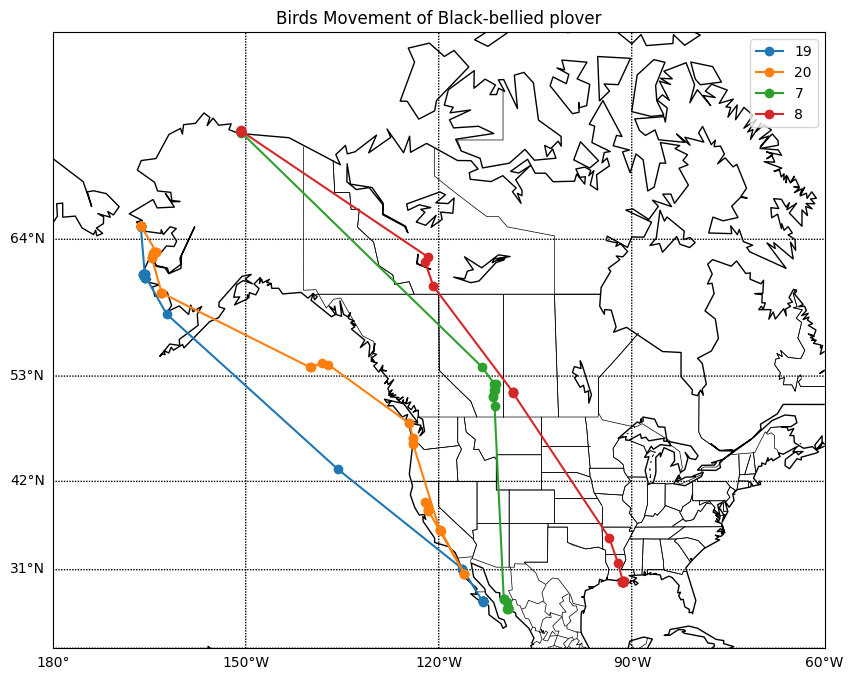

In [95]:
plot_species('Black-bellied plover', 20, 75, -180, -60)

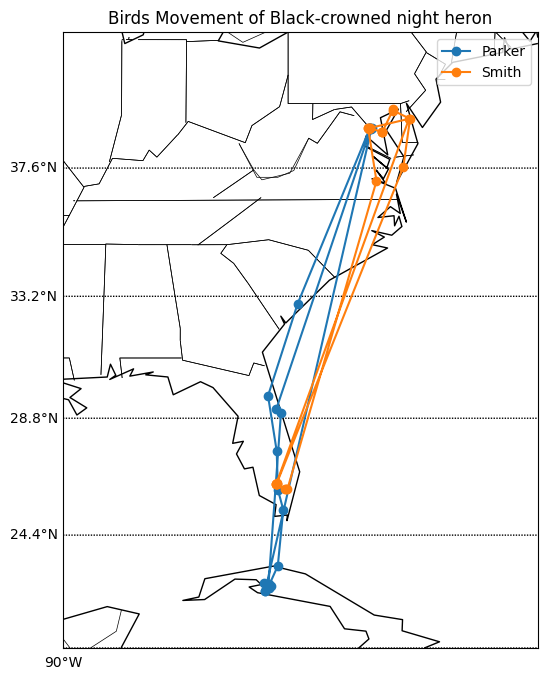

In [111]:
plot_species('Black-crowned night heron', 20, 42, -90, -70, (10,8))

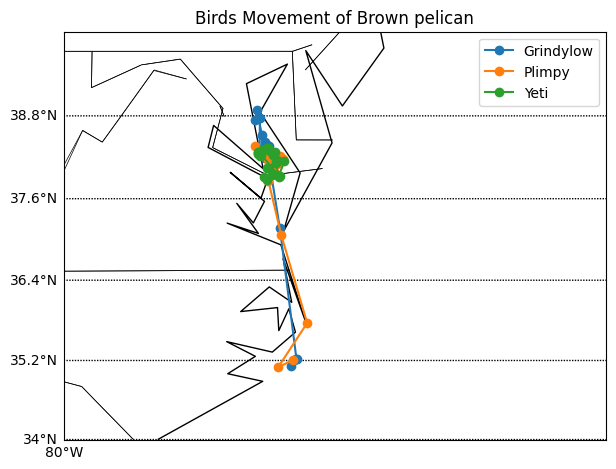

In [119]:
plot_species('Brown pelican', 34, 40, -80, -70, (7,9))

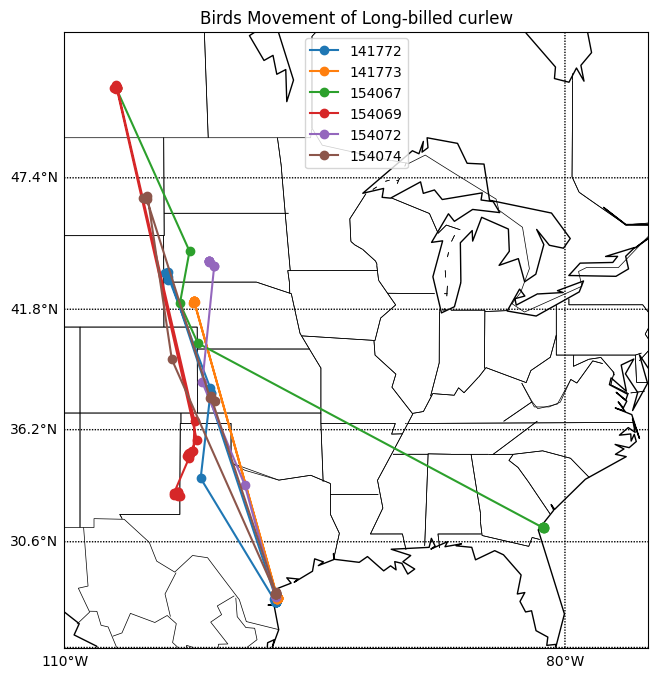

In [123]:
plot_species('Long-billed curlew', 25, 53, -110, -75)

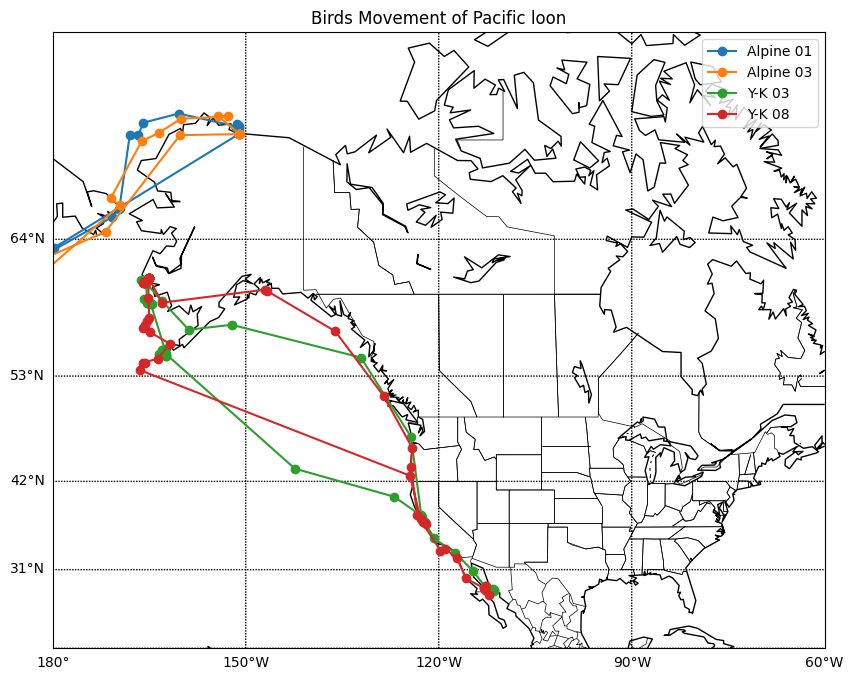

In [124]:
plot_species('Pacific loon', 20, 75, -180, -60)

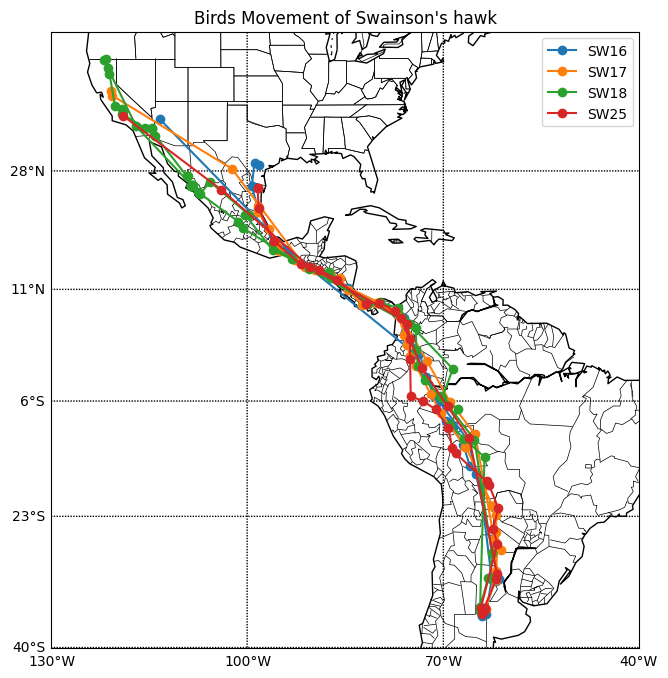

In [130]:
plot_species('Swainson\'s hawk', -40, 45, -130, -40)

In [5]:
group = species_groups.get_group('Swainson\'s hawk')
group1 = group[group["birdID"] == "SW16"]
group2 = group[group["birdID"] == "SW17"]
group3 = group[group["birdID"] == "SW18"]
group4 = group[group["birdID"] == "SW25"]

In [142]:
group1.head(3)

,species,birdID,date,longitude,latitude
536,Swainson's hawk,SW16,1996-10-08,-98.184,28.840
537,Swainson's hawk,SW16,1996-10-09,-98.877,29.120
538,Swainson's hawk,SW16,1996-10-10,-99.299,25.879


In [157]:
def quiver_plot(group):
    # Plotting on world map backdrop
    plt.figure(figsize=(10, 8))

    # Create a Basemap instance with the desired map projection
    m = Basemap(projection='merc', llcrnrlat=-40, urcrnrlat=45, llcrnrlon=-130, urcrnrlon=-50)

    # Draw coastlines, countries, and states
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()

    # Convert longitude and latitude to map coordinates
    x, y = m(group['longitude'].values, group['latitude'].values)

    # Convert date to numeric values
    dates = group['date'].values.astype(np.int64) // 10**9

    # Calculate the differences in longitude and latitude
    diff_lon = np.diff(group['longitude'].values)
    diff_lat = np.diff(group['latitude'].values)

    # Plotting directed motion
    m.quiver(x[:-1], y[:-1], diff_lon, diff_lat, dates[:-1], cmap='coolwarm', scale=100, width=0.0025)

    plt.title('Directed Motion of Points')
    plt.colorbar(label='Date')
    plt.show()


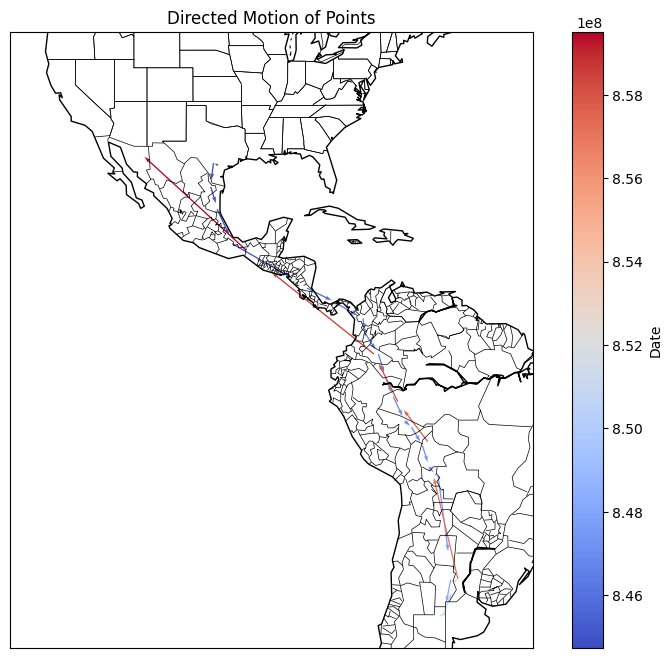

In [158]:
quiver_plot(group1)

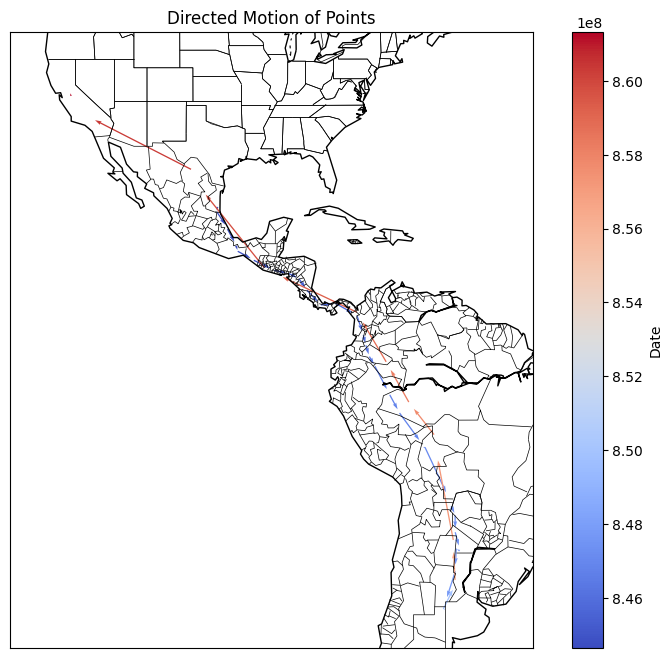

In [159]:
quiver_plot(group2)

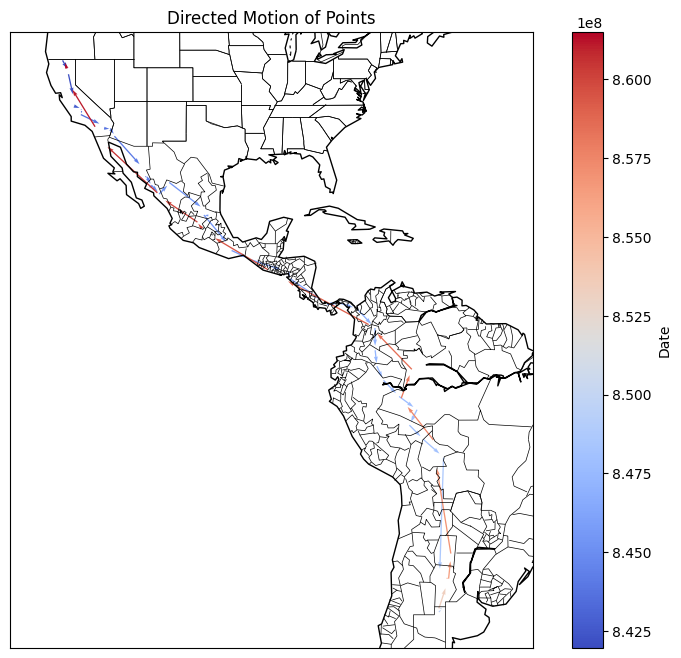

In [160]:
quiver_plot(group3)

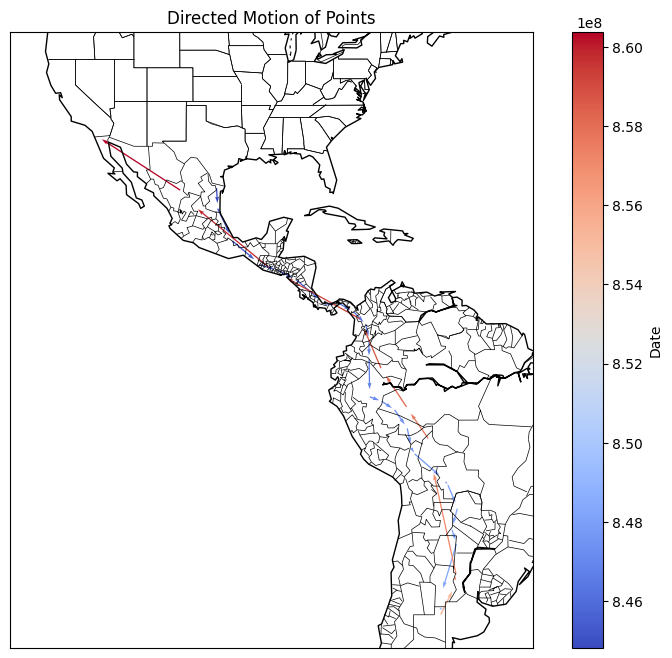

In [161]:
quiver_plot(group4)

In [8]:
# Adjust display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [11]:
unique_years = group.groupby('birdID')['date'].apply(lambda x: x.dt.year.unique())
print(unique_years)

birdID
SW16    [1996, 1997]
SW17    [1996, 1997]
SW18    [1996, 1997]
SW25    [1996, 1997]
Name: date, dtype: object


In [26]:
for _, row in group1[['longitude', 'latitude']][15:].iterrows():
    print('\t'.join(row.astype(str)))

-66.924	-12.65
-65.919	-15.806
-65.005	-16.888
-64.539	-17.066
-62.602	-31.517
-63.442	-35.913
-64.093	-36.022
-64.143	-36.172
-63.687	-35.86
-62.197	-31.829
-62.419	-31.659
-62.008	-31.773
-61.495	-31.451
-66.116	-12.056
-70.692	-6.011
-74.331	1.248
-93.871	16.873
-113.315	34.712


In [10]:
# Pivot the DataFrame to create the new table
pivot_table = group.pivot_table(index='date', columns='birdID', values=['longitude', 'latitude'])

# Flatten the multi-index columns
pivot_table.columns = ['_'.join(map(str,col)).strip() for col in pivot_table.columns.values]

# Reset index to make 'date' a column again
pivot_table.reset_index(inplace=True)

# Sort the DataFrame by 'date'
pivot_table.sort_values(by='date', inplace=True)

# Display the resulting table
print(pivot_table)

          date  latitude_SW16  latitude_SW17  latitude_SW18  latitude_SW25  \
0   1996-09-06            NaN            NaN         41.850            NaN   
1   1996-09-08            NaN            NaN         40.251            NaN   
2   1996-09-15            NaN            NaN         36.445            NaN   
3   1996-09-23            NaN            NaN         36.061            NaN   
4   1996-09-24            NaN            NaN         35.820            NaN   
..         ...            ...            ...            ...            ...   
96  1997-04-18            NaN         37.669            NaN            NaN   
97  1997-04-19            NaN         38.175            NaN            NaN   
98  1997-04-20            NaN            NaN         40.919          35.15   
99  1997-04-21            NaN            NaN         41.991            NaN   
100 1997-05-02         34.712            NaN            NaN            NaN   

     longitude_SW16  longitude_SW17  longitude_SW18  longitude_

In [59]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def near(coordinates, labels, zoom=10):
    # Create a new figure
    plt.figure(figsize=(8, 8))

    latitudes = [coord[1] for coord in coordinates]
    longitudes = [coord[0] for coord in coordinates]

    # Create a Basemap instance
    m = Basemap(projection='merc', llcrnrlat=min(latitudes)-zoom, urcrnrlat=max(latitudes)+zoom, llcrnrlon=min(longitudes)-zoom, urcrnrlon=min(longitudes)+zoom)

    # Draw coastlines, countries, and states
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()

    # Plot the coordinates
    for (lon, lat), label in zip(coordinates, labels):
        x, y = m(lon, lat)
        m.plot(x, y, 'bo')
        plt.text(x, y, label, fontsize=12, ha='right')

    plt.show()

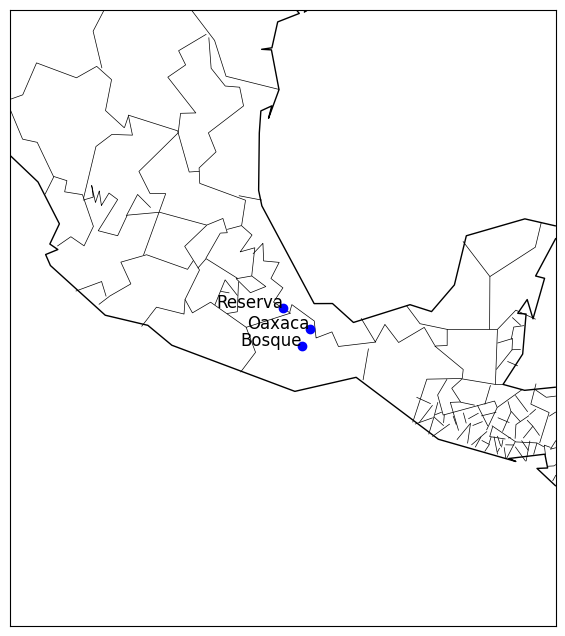

In [50]:
 # Define the coordinates
coordinates = [(-96.021, 17.831), (-97.000, 18.554), (-96.305, 17.228)]
labels = ['Oaxaca', 'Reserva', 'Bosque']
near(coordinates, labels)

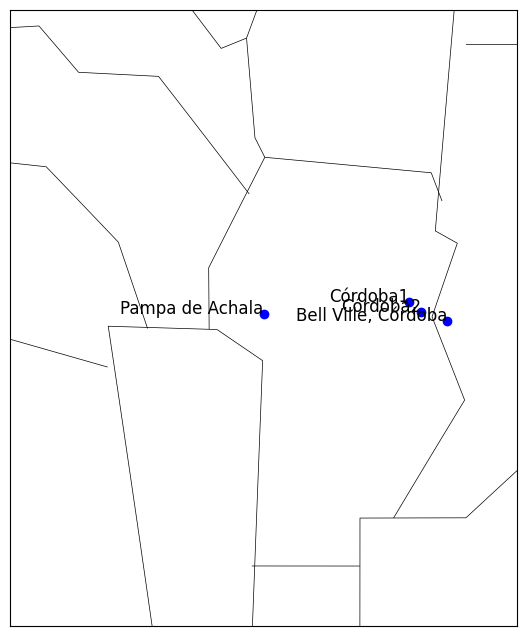

In [58]:
coordinates = [(-62.602, -31.517), (-62.419, -31.659), (-62.008, -31.773), (-64.900, -31.683)]
labels = ['Córdoba1', 'Córdoba2', 'Bell Ville, Córdoba', 'Pampa de Achala']
near(coordinates, labels, zoom=4)

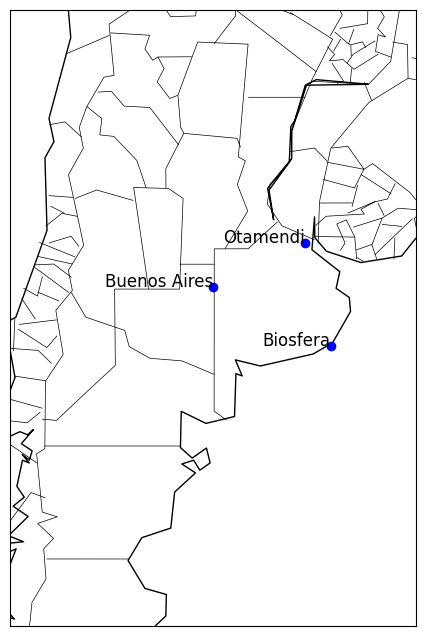

In [60]:
coordinates = [(-63.442, -35.913), (-58.915, -34.139), ( -57.647, -38.246)]
labels = ['Buenos Aires', 'Otamendi', 'Biosfera']
near(coordinates, labels)

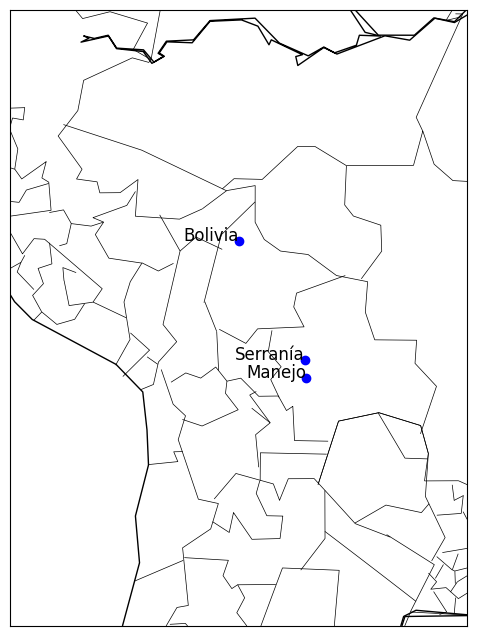

In [62]:
coordinates = [(-66.116, -12.056), (-63.216, -17.116), (-63.160, -17.840)]
labels = ['Bolivia', 'Serranía', 'Manejo']
near(coordinates, labels)

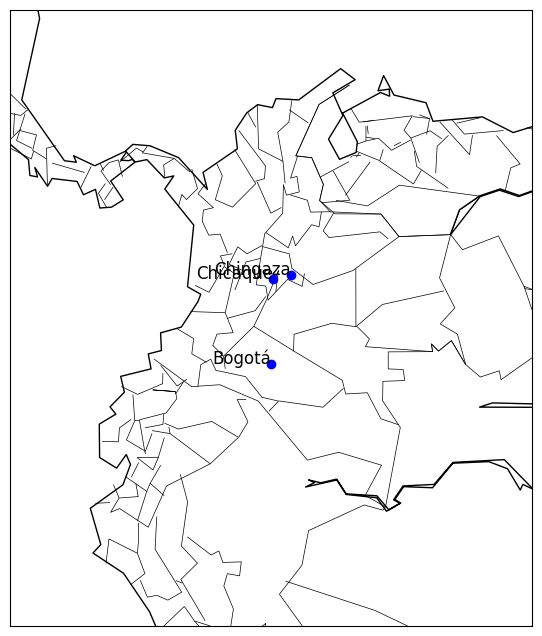

In [61]:
coordinates = [(-74.331, 1.248), (-73.586, 4.648), (-74.247, 4.498)]
labels = ['Bogotá', 'Chingaza', 'Chicaque']
near(coordinates, labels)